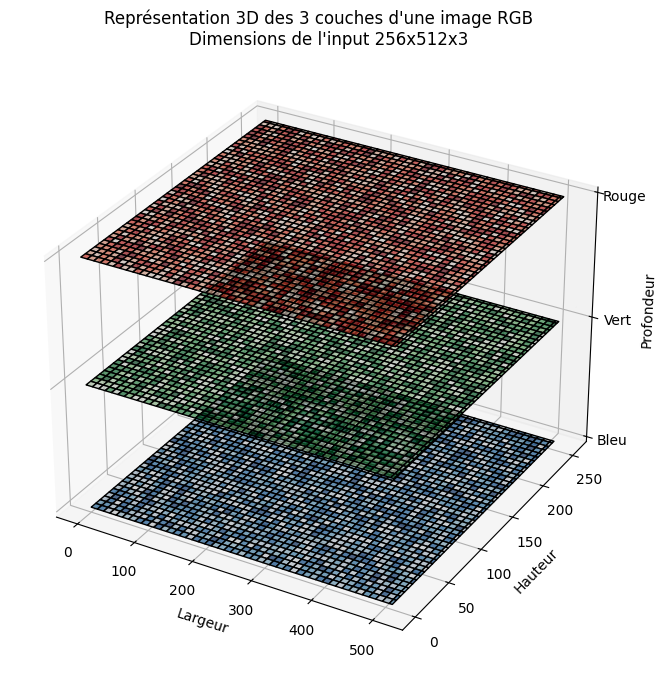

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Définition des dimensions
HAUTEUR, LARGEUR = 256, 512

# Génération de 3 matrices (valeurs aléatoires pour l'exemple)
R = np.random.randint(0, 256, (HAUTEUR, LARGEUR))
G = np.random.randint(0, 256, (HAUTEUR, LARGEUR))
B = np.random.randint(0, 256, (HAUTEUR, LARGEUR))

# Création de la grille de coordonnées X, Y
X, Y = np.meshgrid(np.arange(LARGEUR), np.arange(HAUTEUR))

# Position des 3 couches en profondeur
Z_R, Z_G, Z_B = np.full_like(R, 2), np.full_like(G, 1), np.full_like(B, 0)

# Création de la figure 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Affichage des 3 matrices en tant que surfaces
ax.plot_surface(X, Y, Z_R, facecolors=plt.cm.Reds(R/255), edgecolor='k', alpha=0.7)
ax.plot_surface(X, Y, Z_G, facecolors=plt.cm.Greens(G/255), edgecolor='k', alpha=0.7)
ax.plot_surface(X, Y, Z_B, facecolors=plt.cm.Blues(B/255), edgecolor='k', alpha=0.7)

# Ajustements de la vue
ax.set_xlabel("Largeur")
ax.set_ylabel("Hauteur")
ax.set_zlabel("Profondeur")
ax.set_zticks([0, 1, 2])
ax.set_zticklabels(["Bleu", "Vert", "Rouge"])
ax.set_title(
    """Représentation 3D des 3 couches d'une image RGB
    Dimensions de l'entrée 256x512x3"""
    )

# Affichage
plt.show()


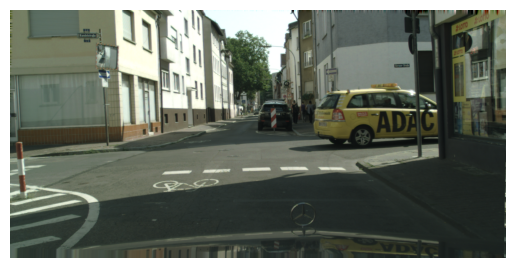

In [9]:
img = plt.imread("../front/images/frankfurt_000000_000294_leftImg8bit.png")
plt.imshow(img)
plt.axis("off")
plt.show()

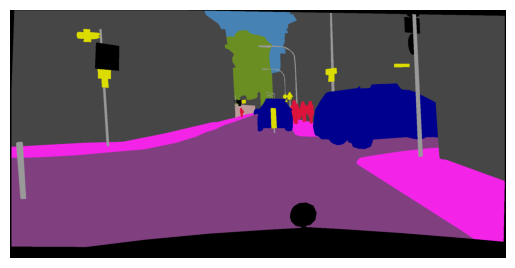

In [8]:
img = plt.imread("../front/images/frankfurt_000000_000294_gtFine_color.png")
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
# Définition des dimensions
HAUTEUR, LARGEUR = 256, 512

# Génération de 3 matrices (valeurs aléatoires pour l'exemple)
R = np.random.randint(0, 256, (HAUTEUR, LARGEUR))
G = np.random.randint(0, 256, (HAUTEUR, LARGEUR))
B = np.random.randint(0, 256, (HAUTEUR, LARGEUR))

# Création de la grille de coordonnées X, Y
X, Y = np.meshgrid(np.arange(LARGEUR), np.arange(HAUTEUR))

# Position des 3 couches en profondeur
Z_R, Z_G, Z_B = np.full_like(R, 2), np.full_like(G, 1), np.full_like(B, 0)

# Création de la figure 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Affichage des 3 matrices en tant que surfaces
ax.plot_surface(X, Y, Z_R, facecolors=plt.cm.Reds(R/255), edgecolor='k', alpha=0.7)
ax.plot_surface(X, Y, Z_G, facecolors=plt.cm.Greens(G/255), edgecolor='k', alpha=0.7)
ax.plot_surface(X, Y, Z_B, facecolors=plt.cm.Blues(B/255), edgecolor='k', alpha=0.7)

# Ajustements de la vue
ax.set_xlabel("Largeur")
ax.set_ylabel("Hauteur")
ax.set_zlabel("Profondeur")
ax.set_zticks([0, 1, 2])
ax.set_zticklabels(["Bleu", "Vert", "Rouge"])
ax.set_title(
    """Représentation 3D des 3 couches d'une image RGB
    Dimensions de l'entrée 256x512x3"""
    )

# Affichage
plt.show()

# Notes

## Workflow
https://docs.google.com/document/d/1kIbxaqzdPZqHEJRxwuFCAar-G8W78VFRgDUEF5Mesjw/edit?invite=CI_q4swC&tab=t.0


## To-Do

- Analyse pré-exploratoire et préparation des données
    - Regarder l'équilibre des catégories avant le train-test-split ? Possible avec np.unique_counts(img_array) sur chaque image (se servir du multiprocessing)
    - Bien formaliser le code du train test split, l'inclure dans utils and constants

- Modele
    - Ajouter une visualisation entre courbe de loss train vs loss val + nom de la fonction de perte + dump
    - Finaliser les callbacks (EarlyStopping, ModelCheckpoint, ReduceLROnPlateau)
    - fonction de visualisation sur la prédiction à affiner
    - plot des métriques à affiner + dump
    - En fonction des déséquilibres ajouter du sample_weight dans le modèle : https://www.tensorflow.org/tutorials/images/segmentation



# Future comms

##  **Les différents types de segmentation**
---

Un modèle de segmentation d'image génère en sortie une carte de segmentation où chaque pixel est classifié dans une catégorie spécifique. La structure de la couche de sortie dépend du type de segmentation :


### **1. Segmentation sémantique (ex : UNet, DeepLabV3)**
Chaque pixel appartient à une classe parmi un nombre fixe de classes.

- **Couche de sortie** : une convolution 2D avec autant de canaux que de classes (`Conv2D(num_classes, kernel_size=1)`).  
- **Tenseur de sortie** : `[batch_size, height, width, num_classes]`.  
- **Post-traitement** : on applique une fonction **softmax** (multiclasses) ou **sigmoïde** (binaire) pour obtenir des probabilités.  
- **Prédiction finale** : l'index du canal ayant la probabilité la plus élevée pour chaque pixel.
- **Métrique** : l'accuracy n'est pas une bonne métrique pour la segmentation, on utilise plutôt l'**Intersection over Union (IoU)** ou le **Dice Score**.
  - Pour les métriques, y_true est de forme sparse (ex : [batch_size, height, width]) et y_pred est de forme dense (ex : [batch_size, height, width, num_classes]).
- **Loss** : on utilise souvent la **cross-entropy** pour la segmentation multiclasse.
  - Pour des raisons computationnelles, on va préférer la fonction de perte `sparse_categorical_crossentropy` (attends y_true sous forme sparse (batch_size, height, width)) à `categorical_crossentropy` (attend y_true sous forme dense (batch_size, height, width, num_classes)) pour les problèmes de segmentation multiclasse.
  - Si on a des problèmes de déséquilibre de classes, il faut ajouter des samples weights dans la loss. (voir guide tensorflow)
  - L'argument from_logits=True dans la fonction de perte indique que la sorte `y_pred` est un vecteur de logits de size `num_classes` sans fonction d'activation.
  - L'agument from_logits=False indique que la sortie `y_pred` est un vecteur de probabilités de size `num_classes` avec une fonction d'activation (softmax).
  - L'argument class_weights permet de donner plus de poids à certaines classes pour compenser un déséquilibre de classes.


💡 **Exemple en segmentation binaire (ex : fond vs objet)**  
- Dernière couche : `Conv2D(1, kernel_size=1, activation="sigmoid")`  
- La sortie est de forme `[batch_size, height, width, 1]` avec des valeurs entre 0 et 1 (probabilité d'appartenir à la classe positive).

💡 **Exemple en segmentation multiclasse (ex : route, voiture, ciel, etc.)**  
- Dernière couche : `Conv2D(num_classes, kernel_size=1, activation="softmax")`  
- La sortie est `[batch_size, height, width, num_classes]`, et on prend `argmax` sur l'axe des classes.


### **2. Segmentation instance (ex : Mask R-CNN)**
Chaque instance d'un objet a un identifiant unique.

- **Sortie plus complexe** :  
  - Une **carte de segmentation** par objet détecté (`[batch_size, num_objects, height, width]`).  
  - Une **carte des scores** (`[batch_size, num_objects]`) pour indiquer la confiance de chaque masque.  
  - Une **boîte englobante** pour chaque instance.  

Ici, chaque pixel peut appartenir à plusieurs objets en même temps, contrairement à la segmentation sémantique.


### **Résumé**
| Type de segmentation | Forme de sortie | Activation | Post-traitement |
|----------------------|----------------|------------|-----------------|
| **Binaire** | `[batch, h, w, 1]` | Sigmoïde | Seuil (0.5) |
| **Multiclasse** | `[batch, h, w, num_classes]` | Softmax | `argmax` sur classes |
| **Instance** | `[batch, num_objects, h, w]` + scores | Variable | Seuil + NMS |

## **Présentation de UNET**

---

**UNet**, un modèle bien connu pour la segmentation sémantique. Ce modèle prend une image RGB de **256x512x3** et renvoie une carte de segmentation de **256x512x8** avec 8 classes.

U-Net is a CNN architecture used for most of the segmentation tasks. It consists of a contraction and expansion path which gives it the name UNet. The contraction path consists of a convolution layer, followed by ReLu followed by max-pooling layers. Along the contraction path, the features get extracted and the spatial information is reduced. Along the expansion path, a series of up convolutions along with concatenation of nigh resolution features are done from the contraction path. The final layer is a 1x1 convolution layer which gives the output of the same size as the input image. The output is a mask of the same size as the input image with each pixel having a value between 0 and 1. The final output is obtained by applying a threshold of 0.5 to the output mask.

### **Architecture du modèle :**
- Encodeur (feature extractor) basé sur **convolutions** + **max pooling** pour extraire les features.
- Décodeur avec **upsampling** (**upconv**) + **concatenation encodeur+decodeur** pour revenir à la résolution d'origine.
- Dernière couche avec **8 canaux** et activation **softmax** pour obtenir une distribution de probabilité sur les classes.

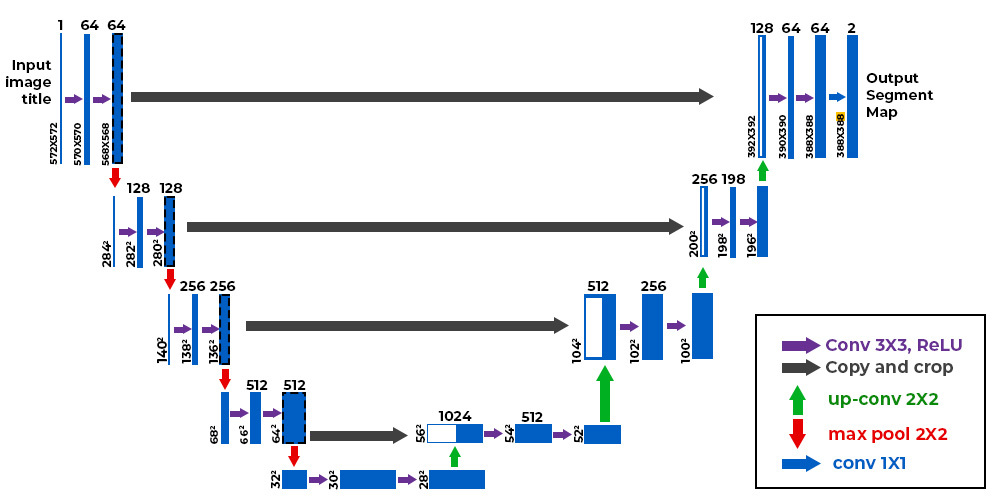


### **Explication de la sortie :**
- La dernière couche `Conv2D(8, (1,1), activation="softmax")` génère un tenseur **(256, 512, 8)**.
- Chaque pixel contient un vecteur de **8 probabilités** (une par classe).
- Pour obtenir l’image segmentée finale, on prend `argmax` sur l’axe des classes pour assigner chaque pixel à la classe la plus probable.


### **Résumé :**
✅ **Entrée** : Image `(256,512,3)`  
✅ **Sortie** : Carte de segmentation `(256,512,8)`  
✅ **Activation finale** : `softmax` pour classification pixel par pixel  
✅ **Post-traitement** : `argmax` pour obtenir la classe de chaque pixel  

## **Format des labels de sortie pour la segmentation**

---

Le format des labels dépend de la **fonction de perte** utilisée. Comme ta couche de sortie utilise une activation **softmax** et génère une sortie `(num_batches, 256, 512, 8)`, voici les deux options possibles :  


### **1️⃣ Labels sous forme d’index : `(num_batches, 256, 512)`**  
👉 **Format :** Chaque pixel est représenté par un entier correspondant à l'index de sa classe (0 à 7).  
👉 **Fonction de perte :** `SparseCategoricalCrossentropy(from_logits=False)`  

**Exemple d'un batch de labels :**  
```python
y_true.shape  # (num_batches, 256, 512), dtype=int
y_true[0, 100, 200]  # Exemple : 3 (classe 3 assignée au pixel (100,200))
```

✅ **Avantages** :
- Plus léger en mémoire.  
- Pas besoin de conversion avant l’entraînement.  

🚀 **Comment charger les labels ?**  
```python
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
```


### **2️⃣ Labels en one-hot : `(num_batches, 256, 512, 8)`**  
👉 **Format :** Chaque pixel est représenté par un vecteur de probabilité où une seule position est à 1 (one-hot encoding).  
👉 **Fonction de perte :** `CategoricalCrossentropy(from_logits=False)`  

**Exemple d'un pixel encodé en one-hot (classe 3)** :  
```python
[0, 0, 0, 1, 0, 0, 0, 0]  # Classe 3 activée
```

✅ **Avantages** :
- Permet de travailler avec des **poids de classes** si les classes sont déséquilibrées.  
- Peut être plus stable pour certaines architectures.  

🚀 **Comment charger les labels ?**  
```python
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
```
💡 Si tes labels sont sous forme `(num_batches, 256, 512)`, il faut les **convertir en one-hot** avant l’entraînement :  
```python
y_true_onehot = tf.one_hot(y_true, depth=8)  # Convertit (batch, 256, 512) → (batch, 256, 512, 8)
```



### **📌 Quelle approche choisir ?**  
✅ **Si tes labels sont stockés comme une image avec une seule valeur par pixel** → **`SparseCategoricalCrossentropy`** (option 1, plus simple).  
✅ **Si tu veux manipuler les probabilités ou ajuster les poids des classes** → **`CategoricalCrossentropy`** (option 2, one-hot).  

🚀 **Recommandation :** Utilise la première approche `(num_batches, 256, 512)` car elle est plus efficace en mémoire et plus simple à gérer.  


## Les métriques pour la segmentation d'images
---


Voici un tableau récapitulatif des applications des métriques d'évaluation en segmentation d'images :  

| **Applications**         | **Metrics Used**                | **Explanation**  |
|--------------------------|--------------------------------|-----------------|
| **Medical Imaging**      | Dice Coefficient, Hausdorff Distance | Assure une segmentation précise pour la détection de tumeurs, la délimitation des organes et l'identification d'anomalies, essentielle pour le diagnostic et le traitement. |
| **Autonomous Driving**   | IoU, Pixel Accuracy           | Évalue la capacité du modèle à identifier et localiser des objets (piétons, véhicules, panneaux) pour garantir une navigation sécurisée des véhicules autonomes. |
| **Satellite and Aerial Imaging** | IoU, Boundary F1 Score | Analyse la classification du couvert terrestre, la planification urbaine et la surveillance environnementale, en évaluant la précision des régions segmentées et des contours. |
| **Agriculture**          | Dice Coefficient, Precision   | Mesure la segmentation des zones de culture saines et malades, facilitant la gestion des cultures et l’optimisation des rendements. |
| **Augmented Reality (AR)** | IoU, Pixel Accuracy         | Garantit un alignement précis des objets virtuels sur les surfaces du monde réel pour améliorer l’expérience utilisateur. |

Ce tableau synthétise les principales métriques utilisées selon les applications et leur importance.

## Formulas


Voici un tableau récapitulatif des formules des principales métriques d'évaluation en segmentation d'images :  

| **Métrique**           | **Formule**  |
|------------------------|-------------|
| **Dice Coefficient**   | \( \frac{2TP}{2TP + FP + FN} \) |
| **IoU (Intersection over Union)** | \( \frac{TP}{TP + FP + FN} \) |
| **Pixel Accuracy**     | \( \frac{TP + TN}{TP + TN + FP + FN} \) |
| **Precision**         | \( \frac{TP}{TP + FP} \) |
| **Recall (Sensitivity)** | \( \frac{TP}{TP + FN} \) |
| **F1 Score**          | \( \frac{2 \times Precision \times Recall}{Precision + Recall} \) |
| **Boundary F1 Score** | Basé sur la F1 Score mais appliqué aux contours segmentés (requiert un calcul spatial des frontières) |
| **Hausdorff Distance** | \( \max \{ \sup_{a \in A} \inf_{b \in B} d(a,b), \sup_{b \in B} \inf_{a \in A} d(a,b) \} \) (distance maximale entre les frontières de la segmentation et de la vérité terrain) |

Ces formules utilisent les termes :
- **TP (True Positives)** : pixels correctement classés comme appartenant à la classe cible.
- **TN (True Negatives)** : pixels correctement classés comme n'appartenant pas à la classe cible.
- **FP (False Positives)** : pixels incorrectement classés comme appartenant à la classe cible.
- **FN (False Negatives)** : pixels incorrectement classés comme n'appartenant pas à la classe cible.

## Critiques des métriques
Pour évaluer la qualité de la segmentation d'images, on utilise des métriques spécifiques qui comparent les prédictions du modèle aux vrais labels en mesurant la qualité de l'overlapping entre le y_pred et y_true. Voici les principales métriques utilisées pour évaluer la segmentation d'images :
- Pixel accuracy pas recommande lorsquil a une  classe dominante comme le background. prends en compte tp et tn
    - (tn+tp)/(tn+fp+fn+fp)


- precision, recall & dice (f1 Sørensen–Dice index) ok (tp dans le numérateur)
    - p (tp)/(tp+fp) : Precision measures the proportion of true positive pixels among all pixels classified as positive by the model
    - r (tp)/(tp+fn) : Recall, on the other hand, measures the proportion of true positive pixels that were correctly identified out of all actual positive pixels
    - d (tp+tp)/(tp+tp+fn+fp) : Dice is the harmonic mean of precision and recall. It is a common metric for segmentation tasks because it is more sensitive to small objects than accuracy.
    - High precision indicates that the model has a low false positive rate, while high recall indicates a low false negative rate.

- IoU, Jaccard Index : best > tp (intersect) dans le numerateur et union dans le diviseur (diviseur tout sauf tn)
    - (tp)/(tp+fn+fp)
    - dice harmonic mean
    - iou > penalize more fp and add a SMOOTH factor to avoid division by 0 and compute IoU for each class absent in the image

- Soft (on probabilities without argmax) / hard (with argmax as ohe)


## Focus on Jackard Index & Dice Coefficient

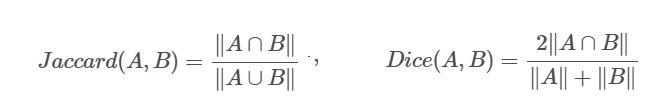

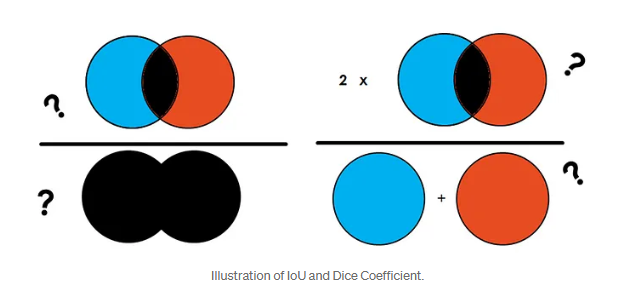


- A gauche, Interesection / Union : IoU = TP / (TP + FP + FN)
- A droite, Dice : Dice (Harmonic mean between recall and precision) = 2 * TP / (2 * TP + FP + FN)

## JACCARD CALCULATION

Let’s calculate the ship IoU first. We assume the total area of the image is 100 (100 pixels). First, let’s think about the ships’ overlap. We can pretend that we move the predicted segmentation (left) directly above the ground truth (right), and see if there are any ship pixels that overlap. Since there are no pixels that are classified as ships by the model, there are 0 overlapping ship pixels.

Union consists of all of the pixels classified as ships from both images, minus the overlap/intersection. In this case, there are 5 pixels (this is an arbitrary number choice) that are classified as ships total. Subtract the overlap/intersection which is 0 to get 5 as the area of union. After doing the calculations, we learn that the IoU is merely 47.5%! See the calculation below.

Here is the detailed calculation:

Ships: Area of Overlap = 0, Area of Union = (5+0)-0 =5

Area of Overlap/Area of Union = 0%

Now for the black background, we do the same thing.

Background: Area of Overlap = 95, Area of Union = (95+100)–95 = 100

Area of Overlap/Area of Union =95%

Mean IoU = (Ships + Background)/2 = (0%+95%)/2 = 47.5%

## DICE CALCULATION

Total Number of Pixels for both images combined = 200

Ships: Area of Overlap = 0

(2 * Area of Overlap)/(total pixels combined) = 0/200 = 0

Background: Area of Overlap = 95

(2 * Area of Overlap)/(total pixels combined) = 95*2/200 = 0.95

Dice = (Ships + Background)/2 = (0%+95%)/2 = 47.5%

## Others metrics

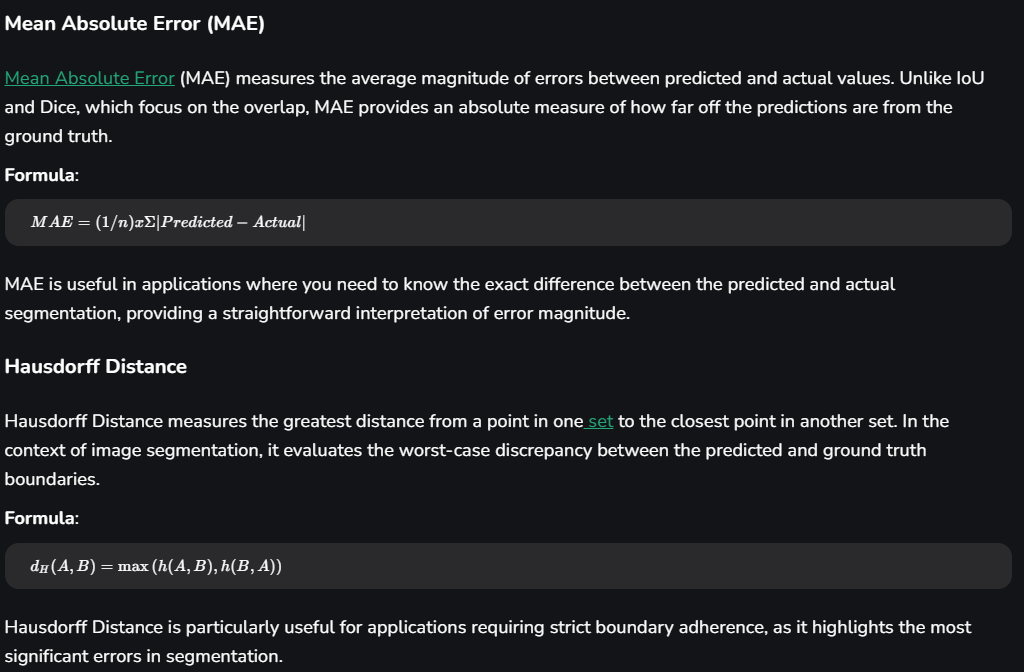

## **ConvNet Architectures**
We have seen that Convolutional Networks are commonly made up of only three layer types: CONV, POOL (we assume Max pool unless stated otherwise) and FC (short for fully-connected). We will also explicitly write the RELU activation function as a layer, which applies elementwise non-linearity. In this section we discuss how these are commonly stacked together to form entire ConvNets.

- Converting FC layers to CONV layers
    - It is worth noting that the only difference between FC and CONV layers is that the neurons in the CONV layer are connected only to a local region in the input, and that many of the neurons in a CONV volume share parameters. However, the neurons in both layers still compute dot products, so their functional form is identical. Therefore, it turns out that it’s possible to convert between FC and CONV layers:


### 📌 **1. Composants d'un CNN**
Un CNN est constitué de plusieurs types de couches :

#### **🔹 Couches Convolutives (Conv Layer)**
- Appliquent des filtres (kernels) pour extraire des **caractéristiques locales**.
- Génèrent des **cartes de caractéristiques (feature maps)**.
- Hyperparamètres : **taille du kernel, stride, padding**.

#### **🔹 Couches d'Activation**
- Introduisent la **non-linéarité**.
- Fonction la plus courante : **ReLU** (Rectified Linear Unit).

#### **🔹 Couches de Pooling (Sous-échantillonnage)**
- Réduisent la **dimensionnalité** et la **sensibilité au bruit**.
- Types :
  - **Max Pooling** : prend la valeur maximale d’une région.
  - **Average Pooling** : prend la moyenne.

#### **🔹 Couches Fully Connected (Dense)**
- Transforme les cartes de caractéristiques en un **vecteur** pour la classification.
- Dernière couche : souvent **Softmax** pour la classification multi-classes.

---

### 🔥 **2. Architectures Populaires de CNN**
Voici quelques architectures CNN célèbres :

#### **1️⃣ LeNet-5 (1998)**
- Premier CNN utilisé pour la reconnaissance de chiffres manuscrits.
- **Structure** :
  - Conv → Pool → Conv → Pool → Dense → Output
- Très simple mais efficace pour de petites images (comme MNIST).

#### **2️⃣ AlexNet (2012)**
- A révolutionné la vision par ordinateur en gagnant ImageNet.
- **Structure** :
  - 5 Convolution + Pooling → 3 Fully Connected
- Introduit **ReLU**, **Dropout** et **GPU training**.

#### **3️⃣ VGG (2014)**
- Approche modulaire avec des **kernels 3x3** pour toutes les convolutions.
- **Variantes : VGG-16, VGG-19**.
- Très profond mais lourd en calcul.

#### **4️⃣ GoogLeNet (Inception) (2014)**
- Introduit les **Inception Blocks** : différentes tailles de filtres en parallèle.
- **Moins de paramètres** qu’AlexNet ou VGG grâce à l’utilisation de convolutions 1x1.

#### **5️⃣ ResNet (2015)**
- Introduit les **skip connections (résiduals)**.
- Résout le problème du **gradient vanishing** dans les réseaux profonds.
- Variantes : **ResNet-18, ResNet-34, ResNet-50, ResNet-101**.

#### **6️⃣ EfficientNet (2019)**
- Basé sur une optimisation du **scaling** (taille des filtres, profondeur, résolution).
- Très performant avec moins de calculs que ResNet.

---

### 🚀 **3. Conception d’un CNN en TensorFlow/Keras**
Un exemple de CNN simple avec **Keras** :

```python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes pour classification
])

model.summary()
```

---

### 🎯 **4. Choisir une Architecture CNN**
| **Modèle**   | **Avantages** | **Inconvénients** |
|-------------|--------------|----------------|
| **LeNet-5**  | Simple et rapide | Mauvaise généralisation sur images complexes |
| **AlexNet**  | Performant sur grands datasets | Très lourd en calcul |
| **VGG**      | Facile à implémenter | Nombre de paramètres énorme |
| **GoogLeNet** | Moins de paramètres | Complexe à implémenter |
| **ResNet**   | Permet des réseaux très profonds | Plus gourmand en mémoire |
| **EfficientNet** | Performant et léger | Architecture optimisée difficile à ajuster |


## Conversion des couches FC et CONV

---

### 🔹 **1. Passage de l'extraction de caractéristiques à la classification**
- **Les couches convolutives** apprennent des **descripteurs locaux** (bords, textures, motifs).
- **Les couches fully connected** interprètent ces descripteurs pour faire une **prédiction globale**.
- Convertir une couche conv en dense permet de **transformer les cartes de caractéristiques en un vecteur de décision**.


### 🔹 **2. Compatibilité avec un classifieur classique**
- **Les couches convolutives génèrent des matrices 3D** (hauteur, largeur, canaux).
- **Les couches fully connected prennent des vecteurs en entrée**.
- La conversion (via un `Flatten()`) permet d'utiliser un **classifieur dense** comme Softmax ou une MLP.

🔹 **Exemple en TensorFlow/Keras** :
```python
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),  # Conversion de la sortie convolutive en vecteur
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Classification sur 10 classes
])
```
- La couche `Flatten()` convertit la sortie des convolutions en **un vecteur 1D** utilisable par les couches `Dense`.

---

### 🔹 **3. Réduction de la dimensionnalité et adaptation aux tâches**
- Dans certains cas, une conversion en fully connected permet de **réduire la taille des paramètres** et d'ajuster l'architecture.
- Exemple : en **transformant les cartes de caractéristiques en un vecteur plus petit**, on peut mieux généraliser et éviter le surajustement.

---

### 🔹 **4. Simulation d’une convolution avec une couche Dense**
- Une **couche convolutionnelle peut être réécrite comme une couche dense** si l'on ignore le partage de poids.
- Exemple : une **convolution 1x1 avec autant de filtres que d'entrées** est **équivalente à une couche dense**.

---

### 🔹 **5. Réduction du besoin en mémoire et calcul**
- **Transformer une convolution en fully connected** peut parfois réduire la mémoire et accélérer l’inférence.
- Exemple : Dans certains modèles mobiles (**MobileNet, SqueezeNet**), une **dernière convolution 1x1 remplace les couches fully connected** pour réduire le nombre de paramètres.

---

### 🎯 **Conclusion**
✅ **Transformer une couche convolutive en fully connected** permet :
- D’adapter les sorties convolutives pour une tâche de classification.
- D’obtenir un vecteur compatible avec des classifieurs denses.
- De modifier l’architecture pour réduire la complexité.

👉 **Alternatives modernes** : Au lieu de `Flatten()`, certains modèles utilisent **Global Average Pooling (GAP)** pour obtenir une sortie plus robuste et compacte :

```python
layers.GlobalAveragePooling2D()
```

## Pooling vs Convolution avec Stride

---

### 🔹 **1. Différences entre Pooling et Convolution avec Stride**
| **Critère** | **Pooling (Max/Average)** | **Convolution avec Stride** |
|------------|--------------------------|----------------------------|
| **Principe** | Sous-échantillonne l’image en prenant un maximum (max pooling) ou une moyenne (average pooling). | Utilise des filtres qui glissent sur l’image avec un pas (`stride > 1`), supprimant ainsi des pixels. |
| **Perte d’information** | Peut perdre des détails importants (surtout avec max pooling). | Garde plus d’informations car la convolution apprend des poids adaptés. |
| **Paramètres appris** | Aucun (opération fixe). | Oui (les poids du filtre sont optimisés pendant l’entraînement). |
| **Consommation mémoire** | Moins coûteux (aucun paramètre à apprendre). | Plus gourmand en calculs (paramètres à optimiser). |
| **Effet sur le gradient** | Peut causer des pertes d’informations abruptes et un gradient moins stable. | Lisse mieux la propagation du gradient grâce aux poids appris. |

---

### 🔥 **2. Pourquoi utiliser une convolution avec stride à la place du pooling ?**
#### ✅ **Avantages de la convolution avec stride :**
1. **Meilleure optimisation** :  
   - Les **poids du filtre** sont appris, contrairement au pooling qui est une opération fixe.
   - Permet au modèle d’optimiser l’extraction de caractéristiques sans perdre trop d’informations.
   
2. **Propagation du gradient améliorée** :  
   - Moins de perte d’information abrupte que le max pooling.
   - Réduit le risque de disparition du gradient dans les réseaux très profonds.

3. **Moins d’opérations distinctes** :  
   - Évite d’avoir une couche supplémentaire pour le pooling → simplifie l’architecture.

4. **Utilisé dans les architectures modernes** :  
   - **ResNet, MobileNet, DenseNet** préfèrent **les convolutions avec stride** au lieu des **poolings classiques**.

---

### ⚠️ **3. Mais faut-il complètement éviter le pooling ?**
Pas forcément ! Il existe des cas où le **pooling reste utile** :

1. **Max pooling pour une meilleure invariance aux translations**  
   - Le max pooling **réduit la sensibilité aux petits déplacements** dans l’image.
   - Utile pour **des tâches de reconnaissance d’objets** où la position exacte n’est pas importante.

2. **Average pooling dans les architectures récentes**  
   - Le **Global Average Pooling (GAP)** est souvent utilisé pour réduire les dimensions tout en gardant une bonne généralisation :
   ```python
   layers.GlobalAveragePooling2D()
   ```
   - Utilisé dans **ResNet, MobileNet** pour éviter des couches fully connected trop grandes.

---

### 🎯 **4. Recommandation selon les cas**
| **Cas d’usage** | **Pooling classique** | **Convolution avec stride** |
|----------------|----------------------|----------------------------|
| **Tâches classiques (classification d’images)** | ✅ Max Pooling souvent efficace. | 🚫 Pas toujours nécessaire. |
| **Modèles modernes (MobileNet, ResNet, EfficientNet)** | 🚫 Souvent remplacé par GAP. | ✅ Strided Convolution préférable. |
| **Besoin d’invariance aux translations** | ✅ Max Pooling utile. | 🚫 Moins efficace. |
| **Optimisation des calculs sur GPU** | 🚫 Pooling moins flexible. | ✅ Strided Convolution plus efficace sur certains hardware. |

---

### 🎯 **Conclusion**
👉 **Remplacer le pooling par une convolution avec stride est souvent bénéfique**, mais pas toujours obligatoire.  
👉 Les architectures modernes tendent à privilégier **les convolutions avec stride ou le Global Average Pooling (GAP)** au lieu du max pooling.  
👉 **Si tu veux un réseau plus optimisé et entraînable, évite le pooling et favorise les convolutions avec stride.** 🚀  

Tu travailles sur quel type de CNN ? 😊

## CONV LAYER & POOL LAYER Input to Output

### CONV LAYER FILTERS (K) AND STRIDE (S) AND PADDING (P) AND SPATIAL EXTENT (F) vs W x H x D (input) 
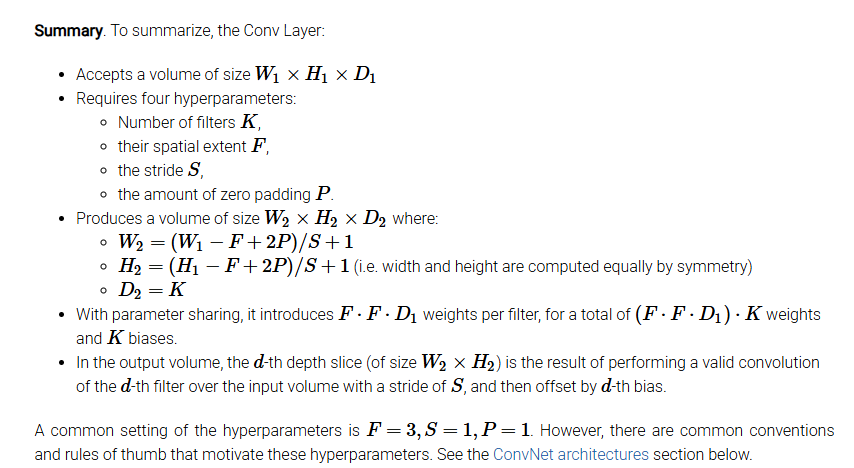

### POOL LAYER FILTERS (K) AND STRIDE (S) AND SPATIAL EXTENT (F) vs W x H x D (input)
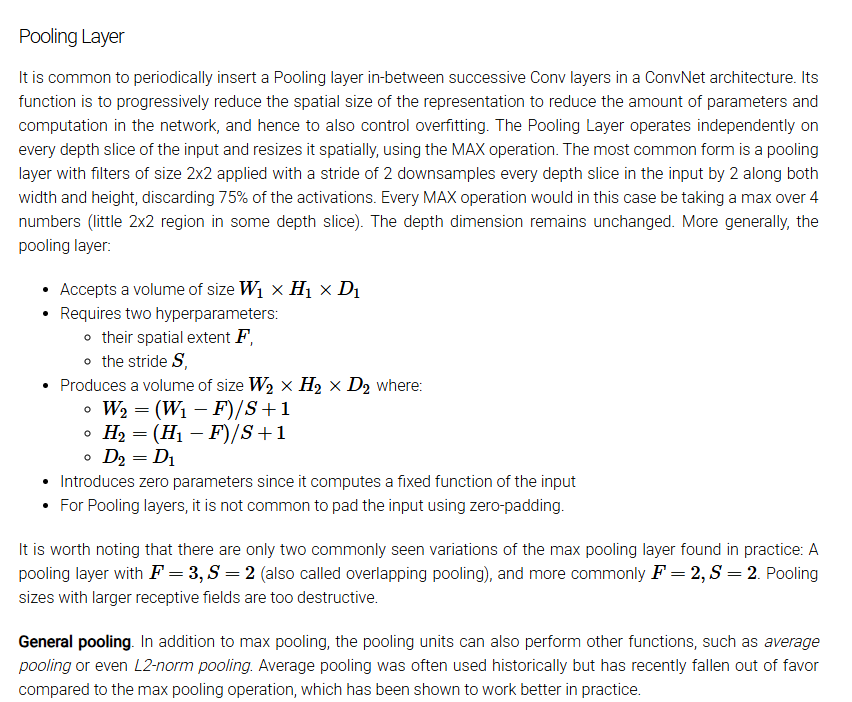

## **Loss & Optimizer**
---

Optimizer that implements the AdamW algorithm.

AdamW optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments with an added method to decay weights per the techniques discussed in the paper, 'Decoupled Weight Decay Regularization' by Loshchilov, Hutter et al., 2019.

According to Kingma et al., 2014, the underlying Adam method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

https://arxiv.org/pdf/1711.05101

Oui, **l'accumulation de gradients** peut indirectement améliorer la généralisation, mais ce n'est pas automatique. Voici pourquoi :  

✅ **Moins de bruit dans les gradients** : Un petit batch produit des gradients plus bruyants, ce qui peut rendre l'optimisation instable. L'accumulation de gradients lisse ces variations et rend l'entraînement plus stable.  

✅ **Effet similaire à un plus grand batch** : En accumulant les gradients sur plusieurs mini-batchs, on se rapproche du comportement d’un entraînement avec un grand batch effectif, qui peut améliorer la convergence et la stabilité.  

🚨 **Mais attention** :  
- Une généralisation optimale dépend aussi d'autres facteurs comme **le taux d’apprentissage, la régularisation (dropout, weight decay), et la diversité des données**.  
- Accumuler trop de gradients peut **réduire la stochasticité**, ce qui peut parfois **nuire à la généralisation** (d'où l’intérêt des petits batchs pour éviter un sur-apprentissage).  

En gros, c’est **un bon compromis** pour stabiliser l'entraînement avec un petit batch, mais il ne remplace pas les autres techniques d'amélioration de la généralisation.  

Tu cherches à optimiser un modèle précis avec cette approche ? 😊

Le papier *Adam: A Method for Stochastic Optimization* de **Diederik P. Kingma** et **Jimmy Ba** présente plusieurs découvertes théoriques concernant l’optimisation stochastique et les méthodes d’apprentissage automatique. Voici les principales contributions théoriques du papier :  

---

### **1️⃣ Cadre mathématique et définition de l’algorithme**  
Les auteurs formalisent Adam en introduisant une mise à jour des poids basée sur les **moments adaptatifs** des gradients. Ils définissent :  

- \( m_t \) : la moyenne mobile des gradients (premier moment).  
- \( v_t \) : la moyenne mobile des carrés des gradients (second moment).  
- Un **biais de correction** pour assurer une bonne estimation lors des premières itérations.  

La mise à jour des paramètres suit la règle :  
\[
\theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{\hat{v_t}} + \epsilon} \hat{m_t}
\]
où \( \alpha \) est le taux d’apprentissage, et \( \epsilon \) un terme de stabilité numérique.  

---

### **2️⃣ Invariance au rééchelonnement diagonal**  
Une des avancées théoriques importantes est que **Adam est invariant à un rééchelonnement diagonal des gradients**, ce qui le rend plus stable et robuste aux transformations d’échelle des données. Cela signifie que, peu importe comment les gradients sont normalisés, l'algorithme maintient sa performance.  

---

### **3️⃣ Bornes sur la convergence (Regret Bound)**  
Adam est analysé sous le cadre de l’**optimisation convexe en ligne** et les auteurs démontrent une borne sur le **regret** de l’algorithme.  

Le **regret** est une mesure de l’écart entre l’optimisation idéale et celle obtenue par Adam. Ils prouvent que ce regret est comparable aux meilleures bornes connues dans le cadre de l’optimisation stochastique, ce qui confirme l’efficacité théorique d’Adam.  

Formellement, le regret cumulatif \( R(T) \) suit une borne du type :  
\[
R(T) = O(\sqrt{T})
\]
ce qui est optimal pour des méthodes d'optimisation adaptatives.  

---

### **4️⃣ Analyse comparative avec d'autres méthodes**  
Adam est comparé à **SGD, AdaGrad et RMSProp**. L’analyse théorique et empirique montre que :  

- **Contrairement à SGD** : Adam ajuste dynamiquement le taux d’apprentissage pour chaque paramètre.  
- **Contrairement à AdaGrad** : Il évite la décroissance trop rapide du taux d’apprentissage.  
- **Contrairement à RMSProp** : Il inclut une correction de biais, ce qui le rend plus stable.  

---

### **5️⃣ Proposition d’AdaMax**  
Une autre avancée théorique du papier est l’introduction d’**AdaMax**, une variante d’Adam qui utilise la norme infinie (au lieu de la norme L2) pour normaliser les gradients. AdaMax stabilise davantage l’optimisation et peut améliorer la robustesse sur certaines tâches.  

La mise à jour suit :  
\[
\theta_{t+1} = \theta_t - \frac{\alpha}{\hat{u_t}} \hat{m_t}
\]
où \( u_t \) est une approximation de la norme infinie des gradients.  

---

### **Conclusion**  
Les découvertes théoriques du papier établissent **Adam comme une méthode d’optimisation adaptative robuste, efficace et stable**, avec des garanties théoriques sur la convergence et des propriétés avantageuses par rapport aux algorithmes précédents.  

Si tu veux plus de détails sur un point particulier, fais-moi savoir ! 😊

### 📌 **Recommandations des auteurs et des chercheurs sur l'utilisation d'Adam et ses paramètres**  

Le papier *Adam: A Method for Stochastic Optimization* de **Diederik P. Kingma** et **Jimmy Ba** propose plusieurs recommandations sur les **paramètres optimaux** et la bonne utilisation de l’algorithme. De plus, des recherches ultérieures ont approfondi ces recommandations.  

---

## **1️⃣ Valeurs par défaut des hyperparamètres**  
Les auteurs recommandent des valeurs spécifiques pour les **hyperparamètres** qui fonctionnent bien dans la majorité des cas :  

| **Paramètre** | **Valeur recommandée** | **Description** |
|--------------|--------------------|----------------|
| \( \alpha \) (taux d'apprentissage) | **0.001** | Contrôle la vitesse de mise à jour des poids. |
| \( \beta_1 \) (moment de premier ordre) | **0.9** | Contrôle l’influence des gradients passés (équivalent à une moyenne mobile). |
| \( \beta_2 \) (moment de second ordre) | **0.999** | Contrôle la variance estimée des gradients (pour éviter les mises à jour instables). |
| \( \epsilon \) (terme de stabilité) | **\(10^{-8}\)** | Évite la division par zéro et stabilise les mises à jour. |

💡 **Pourquoi ces valeurs ?**  
- \( \beta_1 = 0.9 \) permet une bonne estimation des gradients tout en évitant des mises à jour trop brutales.  
- \( \beta_2 = 0.999 \) permet de lisser les variations des gradients et empêche l’instabilité des mises à jour.  
- \( \epsilon = 10^{-8} \) évite les problèmes numériques dus à de petits gradients.  

📌 **Conclusion** : Ces valeurs par défaut sont **très robustes** et fonctionnent bien dans la plupart des problèmes d’apprentissage profond.  

---

## **2️⃣ Cas où le taux d’apprentissage doit être ajusté**  
Bien que \( \alpha = 0.001 \) fonctionne dans la majorité des cas, les auteurs et les chercheurs recommandent :  

✅ **Diminuer \( \alpha \) (ex: \( 0.0001 \) à \( 0.0003 \)) si :**  
- L'apprentissage diverge ou oscille fortement.  
- Le problème est complexe et sensible aux mises à jour.  
- La base de données est **très bruitée** (ex: NLP, vision par ordinateur).  

✅ **Augmenter \( \alpha \) (ex: \( 0.003 \) à \( 0.01 \)) si :**  
- L'entraînement est trop lent et la convergence est difficile.  
- La tâche est relativement simple (ex: régression logistique, MLP simple).  
- Adam est utilisé avec **un warm-up** (augmentation progressive du taux d’apprentissage).  

📌 **Recommandation générale** : **Tester plusieurs valeurs de \( \alpha \) et ajuster selon la stabilité de l’apprentissage.**  

---

## **3️⃣ Ajustements des moments \( \beta_1 \) et \( \beta_2 \)**
Les valeurs par défaut (\( \beta_1 = 0.9 \), \( \beta_2 = 0.999 \)) fonctionnent bien, mais peuvent être modifiées selon le contexte :  

✅ **Réduire \( \beta_1 \) (ex: \( 0.8 \) à \( 0.85 \)) si :**  
- Les gradients varient rapidement (ex: RL, apprentissage par renforcement).  
- On veut favoriser des mises à jour plus réactives.  

✅ **Réduire \( \beta_2 \) (ex: \( 0.99 \) au lieu de \( 0.999 \)) si :**  
- Les gradients sont très fluctuants et bruités.  
- On observe une convergence trop lente.  

📌 **Cas où il faut modifier ces paramètres** : **Expériences avec des tâches spécifiques en NLP, RL, ou petits batchs.**  

---

## **4️⃣ Effet de la taille du batch**
La performance d’Adam est **très sensible à la taille du batch** :  

- **Petit batch** (\(< 32\)) : Adam fonctionne bien mais peut être plus instable.  
- **Batch moyen** (\(32-256\)) : Performance stable et efficace (valeurs par défaut OK).  
- **Grand batch** (\(> 512\)) : Nécessite souvent un **taux d’apprentissage plus élevé** (\( \alpha \)) et un **décroissement de \( \beta_2 \)).  

📌 **Recommandation :**  
- Pour des batchs **petits (<32)** → diminuer \( \alpha \) légèrement.  
- Pour des batchs **grands (>512)** → augmenter \( \alpha \) et réduire \( \beta_2 \).  

---

## **5️⃣ Cas où Adam est sous-optimal**
Bien qu’Adam soit performant, certaines études montrent qu’il **ne généralise pas toujours bien** :  

✅ **Problèmes où Adam est moins performant** :  
- **Tâches nécessitant une bonne généralisation** (ex: classification d’images, NLP).  
- **Problèmes où SGD + momentum est plus efficace** (ex: ResNets, modèles CNN).  

📝 **Recommandations des chercheurs** :  
1. **Utiliser Adam au début**, puis basculer sur **SGD avec momentum** pour une meilleure généralisation.  
2. Expérimenter des variantes comme **AdamW** (plus stable pour l’entraînement des réseaux de neurones profonds).  

---

## **6️⃣ Variantes d'Adam recommandées par les chercheurs**  
Depuis l’article original, plusieurs améliorations d’Adam ont été proposées :  

| **Algorithme** | **Avantage** | **Quand l’utiliser ?** |
|--------------|------------|----------------|
| **AdamW** | Meilleure régularisation (décroissance de poids) | Apprentissage profond avec grande échelle |
| **AMSGrad** | Convergence plus stable | Problèmes où Adam oscille |
| **AdaMax** | Plus robuste aux grands gradients | NLP, traitement du signal |
| **Lion** (2023) | Plus rapide que SGD et Adam | Deep Learning moderne |

📌 **Recommandation** : **Si Adam diverge ou généralise mal, tester AdamW ou AMSGrad.**  

---

### **💡 Conclusion : Bonnes pratiques pour utiliser Adam efficacement**
✅ **Utiliser les valeurs par défaut** : elles fonctionnent bien dans **80% des cas**.  
✅ **Tester différents taux d’apprentissage** : surtout si Adam diverge ou converge mal.  
✅ **Adapter \( \beta_1 \) et \( \beta_2 \)** selon le problème (petits batchs, gradients bruités).  
✅ **Expérimenter avec AdamW ou AMSGrad** si Adam montre des instabilités.  
✅ **Pour la généralisation** : commencer avec Adam puis passer à **SGD avec momentum** si besoin.  

📌 **En résumé : Adam est un excellent choix initial, mais il faut parfois ajuster ses paramètres pour obtenir une meilleure convergence et généralisation.**  

Si tu veux plus de détails sur un point précis, fais-moi savoir ! 😊

### 📌 **Recommandations pour l'utilisation d'Adam en segmentation d'images**  

L’algorithme **Adam** est couramment utilisé pour entraîner des modèles de **segmentation d’images**, notamment basés sur des architectures comme **U-Net, DeepLabV3, Mask R-CNN, FCN (Fully Convolutional Networks)**. Cependant, plusieurs ajustements sont nécessaires pour **optimiser la convergence et la qualité des segments générés**.  

---

## **1️⃣ Choix du taux d’apprentissage (\( \alpha \)) en segmentation d’images**  
La segmentation d’images repose sur l’apprentissage des **structures spatiales complexes**, ce qui rend **le choix du taux d’apprentissage crucial**.  

| **Type de segmentation** | **Taux d’apprentissage recommandé (\( \alpha \))** |
|--------------------------|-----------------------------------|
| **Segmentation binaire (2 classes, ex : tumeur vs non-tumeur)** | **\( 10^{-4} \) à \( 10^{-3} \)** |
| **Segmentation multi-classes (plus de 2 classes)** | **\( 10^{-4} \) à \( 5 \times 10^{-4} \)** |
| **Segmentation fine (ex : objets petits et complexes)** | **\( 10^{-5} \) à \( 10^{-4} \)** |

📌 **Pourquoi ces valeurs ?**  
- \( \alpha = 10^{-3} \) est souvent trop grand pour la segmentation fine (risque de surajustement rapide).  
- \( \alpha = 10^{-4} \) ou \( 5 \times 10^{-4} \) permet une **convergence stable sans explosion des gradients**.  
- Pour les modèles pré-entraînés, **commencer avec un taux faible (\( 10^{-5} \) ou \( 10^{-4} \)) et augmenter progressivement** (warm-up).  

**💡 Bonnes pratiques :**  
- Utiliser une **programmation du taux d’apprentissage** (**scheduler**) pour réduire \( \alpha \) progressivement.  
- Expérimenter **le warm-up** (augmentation progressive de \( \alpha \) au début).  

---

## **2️⃣ Ajustement des moments \( \beta_1 \) et \( \beta_2 \)**  
Les valeurs par défaut **\( \beta_1 = 0.9 \) et \( \beta_2 = 0.999 \)** sont généralement bonnes, mais certains ajustements peuvent améliorer la convergence.  

✅ **Diminuer \( \beta_1 \) (ex : 0.85 - 0.88) si** :  
- Le modèle peine à capturer les **petits objets**.  
- Les gradients sont très variables (ex : segmentation de scènes naturelles).  

✅ **Diminuer \( \beta_2 \) (ex : 0.99) si** :  
- Les gradients sont trop bruités et oscillent beaucoup.  
- On veut **accélérer la convergence**.  

📌 **Astuce** : Pour la segmentation médicale, un **\( \beta_1 \) légèrement plus faible (~0.85) stabilise l’apprentissage des petits détails.**  

---

## **3️⃣ Taille du batch et stabilité de l’optimisation**
La segmentation d’images est **très gourmande en mémoire**, ce qui limite souvent la taille des batchs.  

| **Taille du batch** | **Effet sur Adam** | **Recommandation** |
|-----------------|-------------------|-----------------|
| **\( \leq 4 \)** (très petit) | Fluctuations fortes, convergence lente | **Diminuer \( \alpha \) (\( 10^{-5} \) à \( 10^{-4} \)) et \( \beta_2 \)** |
| **\( 8-16 \)** (petit-moyen) | Bon compromis entre stabilité et mémoire | **Valeurs par défaut (\( 10^{-4} \), \( \beta_1=0.9 \))** |
| **\( 32+ \)** (grand) | Convergence rapide, meilleure généralisation | **Augmenter \( \alpha \) (\( 5 \times 10^{-4} \) à \( 10^{-3} \))** |

💡 **Bonnes pratiques** :  
- Si **batch très petit (\(< 4\))**, essayer **gradient accumulation** (accumuler plusieurs batchs avant mise à jour).  
- Tester **Lookahead Adam (Adam + Lookahead)**, qui stabilise l’optimisation sur petits batchs.  

---

## **4️⃣ Alternatives et variantes d’Adam en segmentation d’images**  
Adam fonctionne bien en segmentation d’images, mais **certaines variantes sont plus adaptées** :  

| **Algorithme** | **Avantages en segmentation** | **Quand l'utiliser ?** |
|--------------|----------------|----------------|
| **AdamW** | Meilleure régularisation, moins de surajustement | Segmentation médicale, petits datasets |
| **AMSGrad** | Évite l’accumulation d’erreurs dans les moments | Tâches avec gradients instables |
| **Lion (2023)** | Plus rapide et plus stable qu’Adam | Segmentation profonde avec gros modèles |
| **SGD + Momentum** | Meilleure généralisation | Modèles CNN de segmentation (U-Net, DeepLab) |

📌 **Recommandation générale** :  
- **AdamW est souvent préféré** pour la segmentation car il réduit le surajustement.  
- **SGD + Momentum** est meilleur si on vise **une bonne généralisation** sur des datasets complexes.  

---

## **5️⃣ Rôle du scheduler pour ajuster Adam dynamiquement**  
Les auteurs d'Adam recommandent de **diminuer progressivement \( \alpha \) au fil du temps** pour améliorer la stabilité et éviter un surajustement rapide.  

💡 **Meilleurs schedulers pour la segmentation d’images** :  
✅ **ReduceLROnPlateau** (diminue \( \alpha \) si la validation stagne)  
✅ **Cosine Annealing** (diminue \( \alpha \) de manière progressive et cyclique)  
✅ **One Cycle Learning Rate** (hausse puis baisse de \( \alpha \) pour stabiliser l’apprentissage)  

📌 **Conclusion** : Toujours utiliser **un scheduler** avec Adam en segmentation !  

---

## **6️⃣ Cas particuliers : segmentation fine et objets rares**
Dans certains cas, Adam doit être ajusté pour détecter **des petits objets ou des structures fines** :  

✅ **Segmentation d’objets petits ou rares** (ex: cellules en microscopie) :  
- **Diminuer \( \alpha \) (\( 10^{-5} \))** pour stabiliser l’apprentissage.  
- **Augmenter \( \beta_1 \) (~0.92)** pour favoriser la conservation des gradients.  
- Essayer **AdamW ou AMSGrad** pour une meilleure stabilité.  

✅ **Segmentation à forte classe déséquilibrée** (ex: 90% fond, 10% objet) :  
- **Utiliser une loss pondérée (Focal Loss, Dice Loss, IoU Loss)** pour mieux équilibrer les classes.  
- **Réduire \( \beta_1 \) (\( 0.85 \))** pour éviter la domination du fond dans l’optimisation.  

---

## **💡 Conclusion générale : Comment bien utiliser Adam pour la segmentation d’images ?**
1️⃣ **Utiliser un taux d’apprentissage modéré (\( 10^{-4} \) à \( 5 \times 10^{-4} \))**  
2️⃣ **Ajuster \( \beta_1 \) et \( \beta_2 \) pour mieux gérer les petits objets et la stabilité**  
3️⃣ **Faire attention à la taille du batch** (petit batch = plus d’instabilité)  
4️⃣ **Expérimenter AdamW ou AMSGrad** pour une meilleure généralisation  
5️⃣ **Toujours utiliser un scheduler** pour ajuster \( \alpha \) dynamiquement  
6️⃣ **Si la généralisation est mauvaise, tester SGD avec momentum**  

📌 **Résumé final** : Adam est très utilisé pour la segmentation d’images, mais **AdamW et SGD avec momentum** peuvent être des alternatives plus robustes dans certains cas. Adapter les hyperparamètres est essentiel pour obtenir une segmentation précise et stable.  

Si tu veux des détails sur un cas spécifique, dis-moi ! 😊

Oui, j’ai connaissance du papier **"Decoupled Weight Decay Regularization"** d’**Ilya Loshchilov et Frank Hutter** (2017).  

📄 **Lien vers le PDF** : [AdamW - Decoupled Weight Decay Regularization](http://arxiv.org/pdf/1711.05101v3)  
🔗 **Résumé et détails** : [arXiv:1711.05101](http://arxiv.org/abs/1711.05101v3)  

---

### 📌 **Résumé et principales contributions du papier**  

Le papier introduit **AdamW**, une version améliorée d’Adam qui **corrige une mauvaise implémentation du "weight decay" (décroissance du poids)** dans les méthodes d’optimisation adaptatives comme Adam.  

🔹 **Problème soulevé** :  
- Dans **SGD**, la régularisation **L2** et le **weight decay** sont **équivalents**.  
- Mais dans **Adam**, ce n’est **pas** le cas !  
- Les implémentations classiques de **"weight decay"** dans Adam sont en réalité des régularisations L2 mal appliquées.  

🔹 **Solution proposée** :  
- **Découpler** le weight decay de l’optimisation des gradients.  
- Proposer **AdamW**, une variante d’Adam qui applique correctement le weight decay après la mise à jour des poids.  
- Montrer empiriquement qu’**AdamW généralise mieux qu’Adam standard**, atteignant des performances comparables à **SGD avec momentum** sur la classification d’images.  

---

### 🔬 **Découverte clé : pourquoi Adam standard est mal régularisé ?**  
Adam applique généralement la **régularisation L2** sous la forme :  
\[
\theta_{t+1} = \theta_t - \alpha (\nabla L(\theta_t) + \lambda \theta_t)
\]
où \( \lambda \) est le coefficient de décroissance du poids.  

🔴 **Problème** :  
Dans Adam, cette formulation **couple** le weight decay avec les gradients adaptatifs, ce qui **change la dynamique d’optimisation** et peut nuire à la généralisation.  

✅ **Solution d’AdamW** :  
AdamW applique la mise à jour d’Adam **sans** la pénalisation L2, puis applique **séparément** la mise à jour du weight decay :  
\[
\theta_{t+1} = \theta_t - \alpha \nabla L(\theta_t)
\]
\[
\theta_{t+1} = \theta_{t+1} - \alpha \lambda \theta_{t+1}
\]
Ainsi, **le weight decay agit directement sur les poids**, sans interférer avec l’optimisation adaptative.  

---

### 🎯 **Pourquoi AdamW est plus efficace qu’Adam classique ?**  

🔹 **Meilleure généralisation** :  
- AdamW **généralise mieux** en réduisant l'effet de surajustement observé avec Adam standard.  
- Il atteint des performances comparables à **SGD avec momentum** en classification d’images (où Adam était historiquement moins performant).  

🔹 **Hyperparamètres indépendants** :  
- Dans Adam, il fallait ajuster **simultanément** \( \alpha \) et \( \lambda \), car ils étaient couplés.  
- Avec AdamW, **le choix du weight decay \( \lambda \) est indépendant du taux d’apprentissage \( \alpha \)**.  

🔹 **Adoption large** :  
- **AdamW est maintenant la version par défaut d’Adam dans PyTorch et TensorFlow**.  
- Il est utilisé dans de nombreux travaux en **vision par ordinateur (classification, segmentation, détection), NLP et deep learning général**.  

---

### 🔥 **Conclusion : pourquoi utiliser AdamW ?**  
✅ **Corrige une mauvaise implémentation du weight decay dans Adam.**  
✅ **Améliore la généralisation**, notamment en classification d’images.  
✅ **Découple l’optimisation des gradients du weight decay**, facilitant le choix des hyperparamètres.  
✅ **Adopté dans les frameworks modernes** et recommandé pour les tâches de deep learning.  

💡 **Si tu utilises Adam pour l’apprentissage profond, il est recommandé d’utiliser AdamW plutôt qu’Adam classique !**  

Si tu veux un approfondissement sur un point spécifique du papier, dis-moi ! 😊

### **📌 Paramètres recommandés pour AdamW en segmentation d’images multiclasses (batch ≤ 16)**  

L’optimisation en segmentation d’images **multiclasses** (ex: segmentation médicale, satellite, scènes naturelles) avec **AdamW** nécessite des **ajustements spécifiques** en raison des **petits batchs** et des **structures complexes à segmenter**.  

---

## **1️⃣ Paramètres recommandés pour AdamW**  
Si la taille du **batch est ≤ 16**, voici les **valeurs optimales** des hyperparamètres :  

| **Paramètre** | **Valeur recommandée** | **Explication** |
|--------------|--------------------|----------------|
| **Taux d’apprentissage (\( \alpha \))** | \( 10^{-4} \) à \( 5 \times 10^{-4} \) | Stable pour petits batchs et segmentation complexe |
| **\( \beta_1 \) (momentum de premier ordre)** | **0.9** | Contrôle la mémoire des gradients |
| **\( \beta_2 \) (momentum de second ordre)** | **0.99** à **0.999** | Permet un meilleur lissage des gradients |
| **Weight decay (\( \lambda \))** | **\( 10^{-2} \) à \( 5 \times 10^{-2} \)** | Améliore la généralisation en régularisant les poids |
| **\( \epsilon \) (terme de stabilité)** | \( 10^{-8} \) | Évite la division par zéro et stabilise les mises à jour |

---

## **2️⃣ Ajustements selon la complexité du dataset**
Le choix précis des hyperparamètres dépend de la difficulté de la segmentation :  

| **Type de segmentation** | **Taux d’apprentissage (\( \alpha \))** | **Weight Decay (\( \lambda \))** | **\( \beta_2 \)** |
|--------------------------|-----------------------------------|-------------------|----------|
| **Structures simples (ex: segmentation de routes, agriculture)** | \( 5 \times 10^{-4} \) | **0.01** | **0.999** |
| **Segmentation avec détails fins (ex: cellules en imagerie médicale)** | \( 10^{-4} \) | **0.05** | **0.99** |
| **Segmentation d’objets petits et rares** | \( 3 \times 10^{-4} \) | **0.02** | **0.995** |

📌 **Conseils** :  
- Si le modèle **surajuste trop vite**, **augmenter le weight decay (\( \lambda \))**.  
- Si l’entraînement est **instable**, **réduire \( \alpha \) et \( \beta_2 \)**.  

---

## **3️⃣ Influence de la taille du batch et ajustements**
Avec **AdamW**, la taille du batch influence la stabilité et la convergence :  

| **Taille du batch** | **Recommandation AdamW** |
|----------------|---------------------------|
| **1 - 4 (très petit batch)** | **Réduire \( \alpha \) à \( 10^{-5} \) et \( \beta_2 \) à 0.99** |
| **8 - 16 (petit batch)** | **\( \alpha = 10^{-4} \) et \( \lambda = 0.01 \) à 0.05** (valeurs optimales) |
| **32+ (grand batch)** | **\( \alpha = 5 \times 10^{-4} \), augmenter \( \lambda \)** |

📌 **Conseil** : **Si le batch est trop petit (< 8), utiliser "gradient accumulation"** pour simuler un batch plus grand.  

---

## **4️⃣ Schedulers recommandés pour AdamW**
AdamW fonctionne mieux avec une **diminution progressive du taux d’apprentissage**.  

✅ **Schedulers efficaces pour la segmentation** :  
1️⃣ **ReduceLROnPlateau** (réduit \( \alpha \) si la validation stagne)  
2️⃣ **Cosine Annealing** (réduit \( \alpha \) progressivement)  
3️⃣ **One Cycle Learning Rate** (hausse puis baisse \( \alpha \) pour plus de stabilité)  

📌 **Astuce** : Toujours **réduire progressivement \( \alpha \)** après quelques epochs pour améliorer la convergence.  

---

### **💡 Récapitulatif des paramètres optimaux pour AdamW en segmentation multiclasses (batch ≤ 16)**
✅ **\( \alpha \) : \( 10^{-4} \) à \( 5 \times 10^{-4} \)**  
✅ **\( \lambda \) (weight decay) : \( 10^{-2} \) à \( 5 \times 10^{-2} \)**  
✅ **\( \beta_1 = 0.9 \), \( \beta_2 = 0.99 - 0.999 \)**  
✅ **Scheduler recommandé : ReduceLROnPlateau ou Cosine Annealing**  

📌 **Résumé** : AdamW est **très performant en segmentation**, surtout avec **un weight decay bien réglé** et un **scheduler** pour ajuster \( \alpha \). Avec **petits batchs (\( \leq 16 \))**, il faut **réduire \( \beta_2 \) et bien ajuster le weight decay** pour éviter un surajustement rapide.  

Si tu veux plus de précisions sur un cas spécifique, dis-moi ! 😊